In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

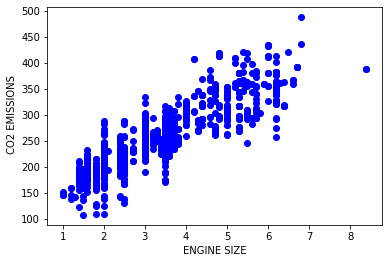

In [4]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel(" CO2 EMISSIONS")
plt.show()

In [5]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly
    

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [11]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
print("COEFFICIENT " , clf.coef_)
print("INTERCEPT " ,clf.intercept_)

COEFFICIENT  [[ 0.         49.3988125  -1.42814225]]
INTERCEPT  [109.41225783]


Text(0, 0.5, 'Emission')

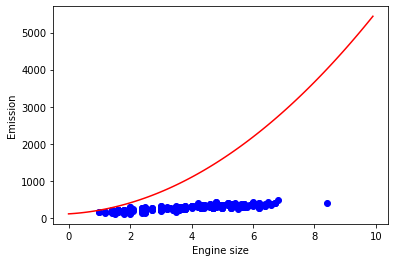

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
xx=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][1]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [13]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.97
Residual sum of squares (MSE): 1008.73
R2-score: 0.67
